In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
user = str(input('Quem está usando? '))

Quem está usando? louise


In [ ]:
import os
if user.upper() == 'LIVIA':
  if os.getcwd() == '/content':
    os.chdir('drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere')
    print(os.getcwd())
    print(os.listdir())
  elif os.getcwd() == '/content/drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere':
    print(os.getcwd())
    print(os.listdir())

#### Carregando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import statsmodels.api as sm
import plotly.express as px
!pip install pymannkendall
import pymannkendall as mk
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import kendalltau
from pymannkendall import original_test

#### Definindo funções

In [ ]:
# Matriz de correlação

# Function to get the title dynamically
def get_title(analise, half=False):
    base_title = titles.get(analise, "Correlation Matrix")
    if half:
        return f"Correlation Matrix (Lower Triangular) - {base_title}"
    return base_title

def correlation_matrix(df, analise):
    # Matriz de correlação entre as colunas com float numbers
    matrix = df.corr()

    # Limita os valores da matriz a 2 casas decimais
    matrix = matrix.round(2)


    # Plota a matriz de correlação
    plt.rcParams["figure.figsize"] = (30, 30)
    fig, ax = plt.subplots()  # Cria explicitamente uma figura e eixos
    sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='RdBu', ax=ax)
    plt.xticks(rotation=45, ha='right')

    # Configurações adicionais
    ax.set_title(get_title(analise), fontsize=20)

    # Exibe o gráfico
    plt.tight_layout()

    # Retorna a figura para que ela possa ser exibida ou salva fora da função
    return fig


def correlation_matrix_half(df, analise):
    """
    Gera uma matriz de correlação exibindo apenas o triângulo inferior.

    Parameters:
    - df: DataFrame, dados numéricos para calcular correlações.

    Returns:
    - figure: objeto da figura da matriz de correlação.
    """
    # Calcula a matriz de correlação
    matrix = df.corr()

    # Limita os valores da matriz a 2 casas decimais
    matrix = matrix.round(2)

    # Máscara para o triângulo superior
    mask = np.triu(np.ones_like(matrix, dtype=bool))

    # Configurações do gráfico
    plt.rcParams["figure.figsize"] = (28, 15)
    fig, ax = plt.subplots()
    sns.heatmap(
        matrix,
        mask=mask,
        annot=True,
        fmt=".2f",
        vmax=1,
        vmin=-1,
        center=0,
        cmap="RdBu",
        cbar_kws={"shrink": 0.8},
        ax=ax,
    )
    plt.xticks(rotation=45, ha='right')

    # Configurações adicionais
    ax.set_title(get_title(analise, half=True), fontsize=20)
    plt.tight_layout()

    # Retornar o objeto da figura sem exibir novamente
    return fig

In [ ]:
# Teste de mann Kendall

def mann_kendall_test(df_scaled):
    trends = {}
    for col in df_scaled.columns:
        result = mk.original_test(df_scaled[col])  # Aplicando o teste de Mann-Kendall
        trends[col] = {"Trend": result.trend, "P-value": result.p, "Tau": result.Tau, "h": result.h}

    return pd.DataFrame(trends).T

#### Abrindo arquivo .csv

In [ ]:
# Caminho do arquivo CSV
file_path = '/content/drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere/indices_clima_merged_1981-2023_out-abril.csv'

# Carregando DataFrame
df = pd.read_csv(file_path, delimiter=',')

# Limpando a coluna de nomes
df.columns = df.columns.str.strip()

# Renomeando as colunas
df = df.rename(columns={
    'CBM': 'BMC',
    'ATL_NL': 'ATL_NE',
    'ATL_CL': 'ATL_CE'
})

# Exibindo DataFrame atualizado
df


,time,AO,AMM,AMO,ATSST,BEST,CAR,CIP,EA_WR,EPI,...,SPI6_Cerrado,SPI6_Mata Atlantica,SPI6_Caatinga,SPI6_Pampa,SPI12_Amazonia,SPI12_Pantanal,SPI12_Cerrado,SPI12_Mata Atlantica,SPI12_Caatinga,SPI12_Pampa
0,1981-01-01,-0.116,1.72,-0.189,0.307,-0.31,-0.14,103.0,0.11,-0.59035,...,0.560264,0.198903,-0.169154,-0.028721,-0.443858,0.719208,0.735646,0.169485,-0.058996,0.152609
1,1981-02-01,-0.332,2.78,-0.188,0.154,-0.03,-0.13,8.0,-1.13,0.38788,...,-0.067606,-0.086074,-0.710128,0.442346,-0.562161,0.417538,-0.495411,-0.170494,-1.424401,0.416807
2,1981-03-01,-1.645,5.09,-0.007,1.124,0.82,-0.10,120.0,0.90,0.81679,...,0.206004,-0.044584,0.623428,0.473861,-0.679338,0.590223,0.229004,0.084782,-0.085384,-0.090331
3,1981-04-01,0.430,4.03,-0.103,0.501,0.18,-0.10,27.0,1.37,0.71754,...,0.237764,0.151643,0.449238,-0.028749,-0.749129,0.532562,0.052104,0.067001,0.076559,-0.213990
4,1981-10-01,-1.167,-0.90,-0.194,-0.147,0.32,-0.16,342.0,-2.08,-0.57056,...,0.158852,-0.458237,-1.004214,-1.133636,-0.763607,0.653092,0.264107,-0.260659,0.100911,-0.764125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2023-03-01,0.280,1.02,NaN,NaN,-0.15,NaN,NaN,1.99,-0.50327,...,0.158589,0.606244,0.685068,-1.639125,0.307507,0.094885,-0.091385,0.601789,0.643621,-0.936100
297,2023-04-01,-0.973,1.12,NaN,NaN,0.12,NaN,NaN,-0.22,-0.14821,...,0.285663,0.621780,0.554926,-1.821790,0.316293,0.418269,0.107707,0.656667,0.645254,-1.510657
298,2023-10-01,-0.414,5.51,NaN,NaN,-9.99,NaN,NaN,0.61,1.31229,...,-0.490825,0.334470,-0.190880,1.695539,-0.030967,-0.204915,0.036830,0.739552,0.372502,0.220505
299,2023-11-01,-0.036,4.00,NaN,NaN,-9.99,NaN,NaN,0.13,-999.00000,...,-1.121791,0.354439,-0.704454,1.966431,-0.239325,-0.006385,-0.358641,0.682575,-0.220360,0.809467


### Figuras período dos dados

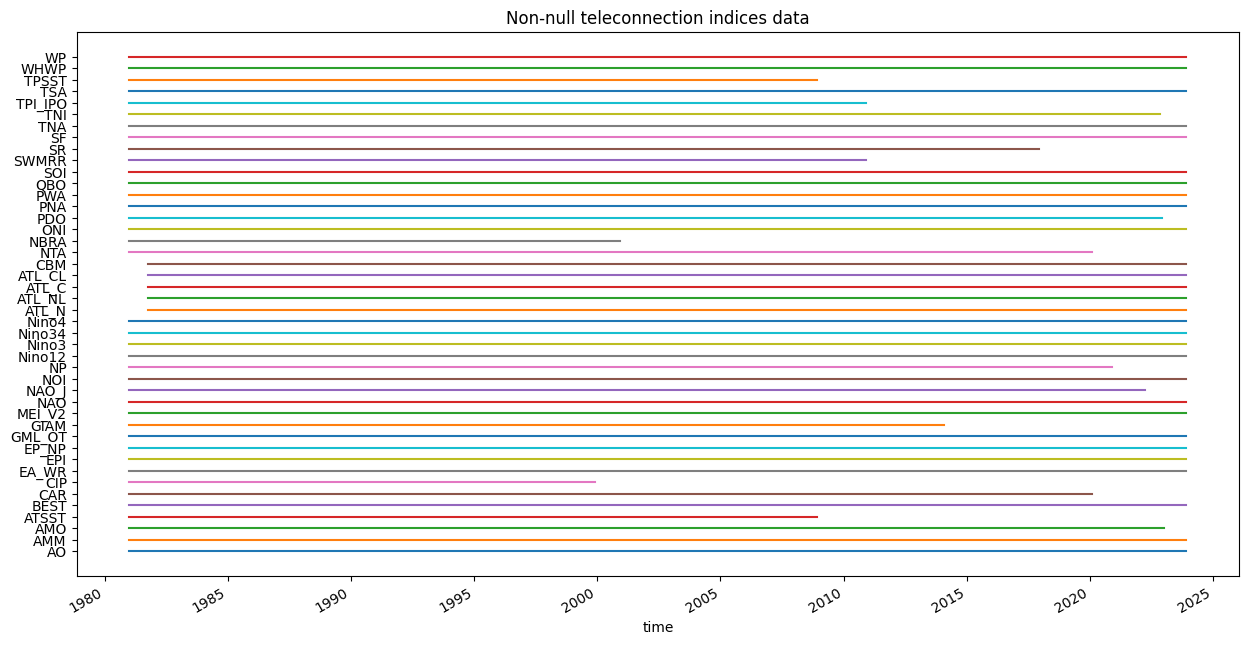

In [ ]:
df.columns[0:45]
# Plotar linha continua reta para dados não nulos e deixar em branco para dados nulos

# # Convertendo 'time' para datetime e definindo como índice
# df['time'] = pd.to_datetime(df['time'])
# df.set_index('time', inplace=True)

# Selecionando apenas as colunas de interesse
linha = df.iloc[:, :44].copy()

# Criando um mapeamento para os valores não nulos
for i, col in enumerate(linha.columns):
    linha[col] = linha[col].where(linha[col].isnull(), i)

# Plotar linha contínua para dados não nulos de cada variável

fig, ax = plt.subplots(figsize = (15, 8))

linha.plot(ax = ax, legend = False)

# Definir labels em y como as variáveis e estação
ax.set_yticks(range(len(linha.columns)))
ax.set_yticklabels([f'{estacao}' for estacao in linha.columns])

# Definir título
ax.set_title('Non-null teleconnection indices data')

# Define output directory
output_dir = "/content/drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere/Figuras"
os.makedirs(output_dir, exist_ok=True)

filename = f"{output_dir}/non-null_data_teleconnections.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")


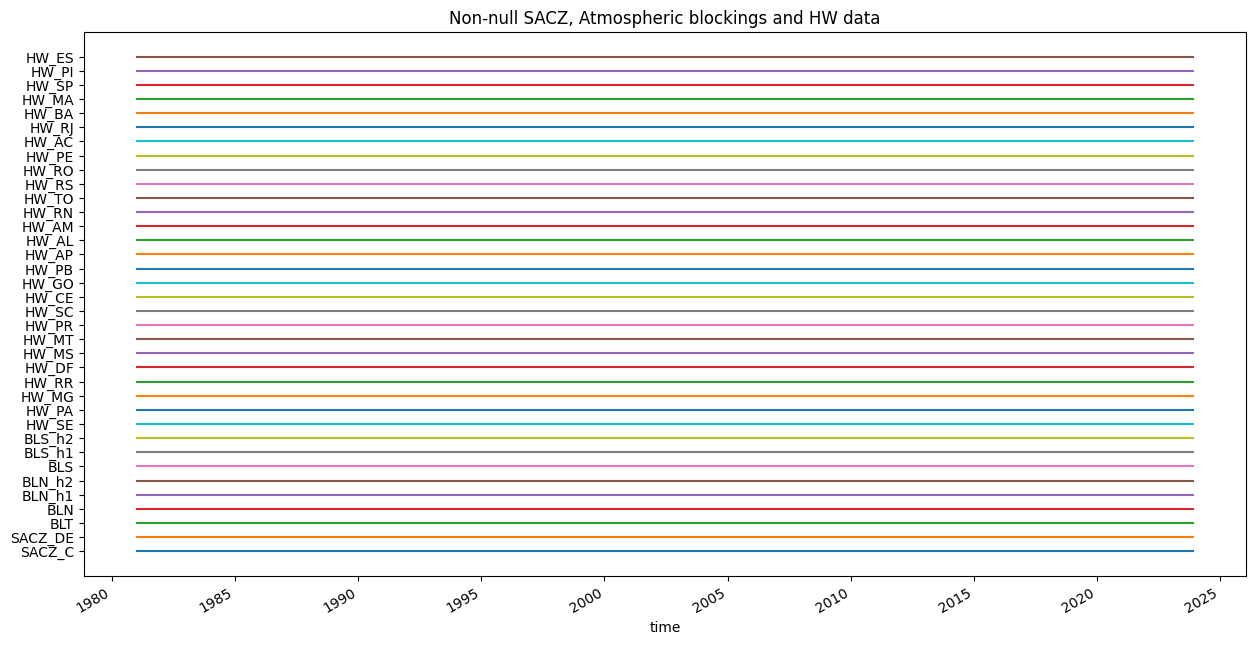

In [ ]:
df.columns[45:81]
# Plotar linha continua reta para dados não nulos e deixar em branco para dados nulos

# # Convertendo 'time' para datetime e definindo como índice
# df['time'] = pd.to_datetime(df['time'])
# df.set_index('time', inplace=True)

# Selecionando apenas as colunas de interesse
linha = df.iloc[:, 45:81].copy()

# Criando um mapeamento para os valores não nulos
for i, col in enumerate(linha.columns):
    linha[col] = linha[col].where(linha[col].isnull(), i)

# Plotar linha contínua para dados não nulos de cada variável

fig, ax = plt.subplots(figsize = (15, 8))

linha.plot(ax = ax, legend = False)

# Definir labels em y como as variáveis e estação
ax.set_yticks(range(len(linha.columns)))
ax.set_yticklabels([f'{estacao}' for estacao in linha.columns])

# Definir título
ax.set_title('Non-null SACZ, Atmospheric blockings and HW data')

# Define output directory
output_dir = "/content/drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere/Figuras"
os.makedirs(output_dir, exist_ok=True)

filename = f"{output_dir}/non-null_data_sacz_block_hw.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

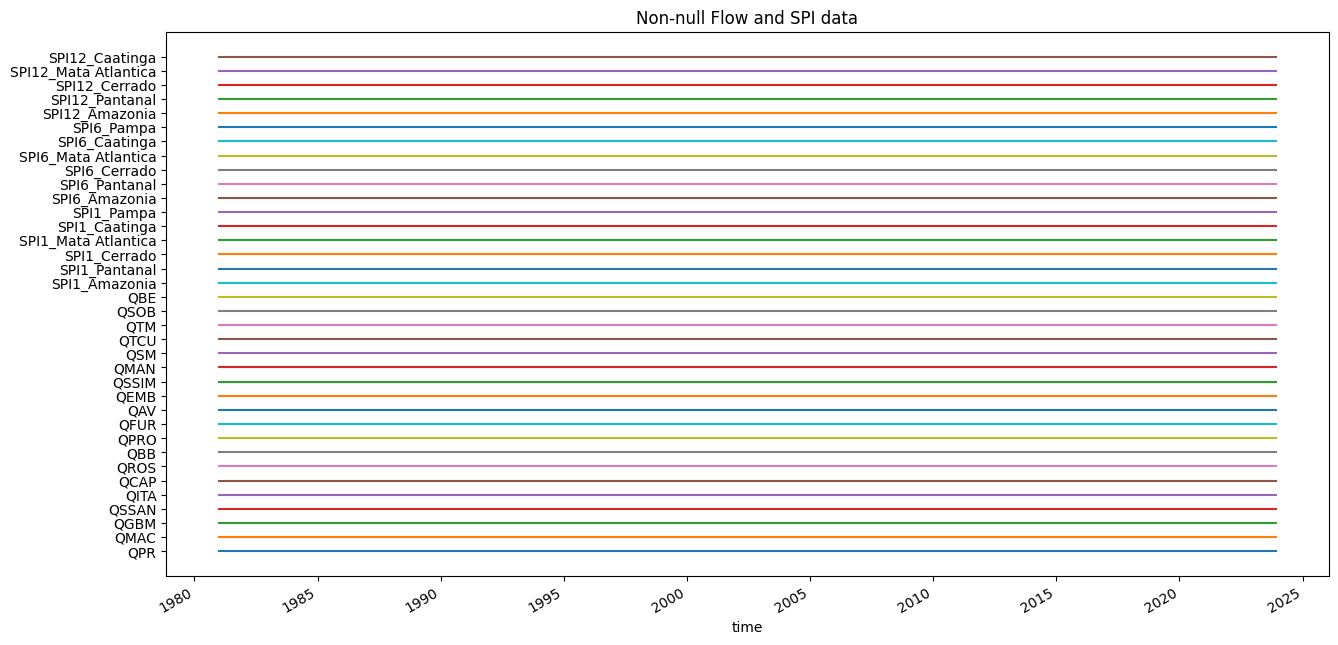

In [ ]:
df.columns[81:-1]
# Plotar linha continua reta para dados não nulos e deixar em branco para dados nulos

# # Convertendo 'time' para datetime e definindo como índice
# df['time'] = pd.to_datetime(df['time'])
# df.set_index('time', inplace=True)

# Selecionando apenas as colunas de interesse
linha = df.iloc[:, 81:-1].copy()

# Criando um mapeamento para os valores não nulos
for i, col in enumerate(linha.columns):
    linha[col] = linha[col].where(linha[col].isnull(), i)

# Plotar linha contínua para dados não nulos de cada variável

fig, ax = plt.subplots(figsize = (15, 8))

linha.plot(ax = ax, legend = False)

# Definir labels em y como as variáveis e estação
ax.set_yticks(range(len(linha.columns)))
ax.set_yticklabels([f'{estacao}' for estacao in linha.columns])

# Definir título
ax.set_title('Non-null Flow and SPI data')

# Define output directory
output_dir = "/content/drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere/Figuras"
os.makedirs(output_dir, exist_ok=True)

filename = f"{output_dir}/non-null_data_flow_spi.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")

In [ ]:
# Define column lists based on the analysis type
columns_to_drop_dict = {
    "sacz_blocking_hw": [
        "AO","AMM","AMO","ATSST","BEST","CAR","CIP","EA_WR","EPI","EP_NP","GML_OT","GIAM","MEI_V2","NAO","NAO_J","NOI",	"NP","Nino12","Nino3","Nino34",	"Nino4",
        "ATL_N", "ATL_NL", "ATL_C", "ATL_CL", "CBM",
        "NTA", "NBRA",	"ONI","PDO","PNA","PWA","QBO","SOI","SWMRR","SR","SF","TNA","TNI","TPI_IPO","TSA","TREND","TPSST","WHWP","WP",
        "QPR",	"QMAC",	"QGBM",	"QSSAN","QITA",	"QCAP",	"QROS",	"QBB",	"QPRO",	"QFUR",	"QAV",	"QEMB",	"QSSIM","QMAN",	"QSM", "QTCU",	"QTM",	"QSOB",	"QBE",
        "HW_PB", "HW_SE", "HW_AL", "HW_RN", "HW_BA", "HW_MA",
        "SPI1_Amazonia","SPI1_Pantanal","SPI1_Cerrado",	"SPI1_Mata Atlantica","SPI1_Caatinga","SPI1_Pampa",
        "SPI6_Amazonia","SPI6_Pantanal","SPI6_Cerrado","SPI6_Mata Atlantica","SPI6_Caatinga","SPI6_Pampa",
        "SPI12_Amazonia","SPI12_Pantanal",	"SPI12_Cerrado","SPI12_Mata Atlantica",	"SPI12_Caatinga","SPI12_Pampa"
    ],
    "tele_sacz_blocking": [
        "QPR",	"QMAC",	"QGBM",	"QSSAN","QITA",	"QCAP",	"QROS",	"QBB",	"QPRO",	"QFUR",	"QAV",	"QEMB",	"QSSIM","QMAN",	"QSM", "QTCU",	"QTM",	"QSOB",	"QBE",
        "HW_PB", "HW_SE", "HW_AL", "HW_RN", "HW_BA", "HW_MA",
        "HW_SE","HW_PA","HW_MG","HW_RR",
        "HW_DF","HW_MS","HW_MT","HW_PR","HW_SC","HW_CE","HW_GO","HW_PB","HW_AP",
        "HW_AL","HW_AM","HW_RN","HW_TO","HW_RS","HW_RO","HW_PE","HW_AC","HW_RJ", "HW_SP","HW_PI","HW_ES",
        "SPI1_Amazonia","SPI1_Pantanal","SPI1_Cerrado",	"SPI1_Mata Atlantica","SPI1_Caatinga","SPI1_Pampa",
        "SPI6_Amazonia","SPI6_Pantanal","SPI6_Cerrado","SPI6_Mata Atlantica","SPI6_Caatinga","SPI6_Pampa",
        "SPI12_Amazonia","SPI12_Pantanal",	"SPI12_Cerrado","SPI12_Mata Atlantica",	"SPI12_Caatinga","SPI12_Pampa"
    ],
    "sacz_blocking_vazao": [
        "AO","AMM","AMO","ATSST","BEST","CAR","CIP","EA_WR","EPI","EP_NP","GML_OT","GIAM","MEI_V2","NAO","NAO_J","NOI",	"NP","Nino12","Nino3","Nino34",	"Nino4",
        "ATL_N", "ATL_NL", "ATL_C", "ATL_CL", "CBM",
        "NTA", "NBRA",	"ONI","PDO","PNA","PWA","QBO","SOI","SWMRR","SR","SF","TNA","TNI","TPI_IPO","TSA","TREND","TPSST","WHWP","WP",
        "HW_PB", "HW_SE", "HW_AL", "HW_RN", "HW_BA", "HW_MA",
        "HW_SE","HW_PA","HW_MG","HW_RR",
        "HW_DF","HW_MS","HW_MT","HW_PR","HW_SC","HW_CE","HW_GO","HW_PB","HW_AP",
        "HW_AL","HW_AM","HW_RN","HW_TO","HW_RS","HW_RO","HW_PE","HW_AC","HW_RJ", "HW_SP","HW_PI","HW_ES",
        "SPI1_Amazonia","SPI1_Pantanal","SPI1_Cerrado",	"SPI1_Mata Atlantica","SPI1_Caatinga","SPI1_Pampa",
        "SPI6_Amazonia","SPI6_Pantanal","SPI6_Cerrado","SPI6_Mata Atlantica","SPI6_Caatinga","SPI6_Pampa",
        "SPI12_Amazonia","SPI12_Pantanal",	"SPI12_Cerrado","SPI12_Mata Atlantica",	"SPI12_Caatinga","SPI12_Pampa"
    ],
    "sacz_blocking_spi": [
        "AO","AMM","AMO","ATSST","BEST","CAR","CIP","EA_WR","EPI","EP_NP","GML_OT","GIAM","MEI_V2","NAO","NAO_J","NOI",	"NP","Nino12","Nino3","Nino34",	"Nino4",
        "ATL_N", "ATL_NL", "ATL_C", "ATL_CL", "CBM",
        "NTA",	"NBRA",	"ONI","PDO","PNA","PWA","QBO","SOI","SWMRR","SR","SF","TNA","TNI","TPI_IPO","TSA","TREND","TPSST","WHWP","WP",
        "QPR",	"QMAC",	"QGBM",	"QSSAN","QITA",	"QCAP",	"QROS",	"QBB",	"QPRO",	"QFUR",	"QAV",	"QEMB",	"QSSIM","QMAN",	"QSM", "QTCU",	"QTM",	"QSOB",	"QBE",
        "HW_PB", "HW_SE", "HW_AL", "HW_RN", "HW_BA", "HW_MA",
        "HW_SE","HW_PA","HW_MG","HW_RR",
        "HW_DF","HW_MS","HW_MT","HW_PR","HW_SC","HW_CE","HW_GO","HW_PB","HW_AP",
         "HW_AL","HW_AM","HW_RN","HW_TO","HW_RS","HW_RO","HW_PE","HW_AC","HW_RJ", "HW_SP","HW_PI","HW_ES",
    ]
}



In [ ]:

# Define the analysis type
analise = "tele_sacz_blocking"  # Change this as needed: "sacz_blocking_hw", "tele_sacz_blocking", "sacz_blocking_vazao", "sacz_blocking_spi"


# Define a dictionary for dynamic titles
titles = {
    "sacz_blocking_hw": "Correlation Matrix - SACZ, Blocking, and Extreme Heatwave Index for Brazil",
    "tele_sacz_blocking": "Correlation Matrix - Teleconnections, SACZ, and Blocking for Brazil",
    "sacz_blocking_vazao": "Correlation Matrix - SACZ, Blocking, and River Flow for Brazil",
    "sacz_blocking_spi": "Correlation Matrix - SACZ, Blocking, and Standardized Precipitation Index for Brazil"
}

# Select the appropriate columns to drop based on the analysis type
columns_to_drop = columns_to_drop_dict.get(analise, [])

# Drop columns from the DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first 5 rows of the DataFrame
df.head(5)

,time,AO,AMM,AMO,ATSST,BEST,CAR,CIP,EA_WR,EPI,...,SACZ_AB,SACZ_C,SACZ_DE,BLT,BLN,BLN_h1,BLN_h2,BLS,BLS_h1,BLS_h2
0,1981-01-01,-0.116,1.72,-0.189,0.307,-0.31,-0.14,103.0,0.11,-0.59035,...,10.023056,19.434812,8.996862,-0.137152,-0.279951,-0.232914,-0.335095,-0.116780,-0.052210,-0.142565
1,1981-02-01,-0.332,2.78,-0.188,0.154,-0.03,-0.13,8.0,-1.13,0.38788,...,4.641774,7.450345,10.046528,-0.152940,-0.347325,-0.396255,-0.305999,-0.093271,-0.076712,-0.073578
2,1981-03-01,-1.645,5.09,-0.007,1.124,0.82,-0.10,120.0,0.90,0.81679,...,31.340759,18.261627,11.389305,-0.291816,-0.287495,-0.301893,-0.281003,-0.364857,-0.301903,-0.381700
3,1981-04-01,0.430,4.03,-0.103,0.501,0.18,-0.10,27.0,1.37,0.71754,...,6.943662,4.223556,3.035581,-0.500553,-0.410851,-0.408757,-0.419987,-0.615933,-0.542235,-0.634644
4,1981-10-01,-1.167,-0.90,-0.194,-0.147,0.32,-0.16,342.0,-2.08,-0.57056,...,7.614045,5.237220,1.366626,-0.402543,-0.214531,-0.215206,-0.223078,-0.598177,-0.500833,-0.640722


#### Matriz de correlação

In [ ]:
# Normalize numeric columns while keeping the 'time' column

# Identify numeric columns (exclude 'time' and any other non-numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Normalizar usando Z-Score Normalization
scaler = StandardScaler()

# Normalizando as colunas numéricas
df_scaled_array = scaler.fit_transform(df[numeric_cols])

# Converter o array numpy de volta para um DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=numeric_cols, index=df.index)

# Exibir o DataFrame normalizado
df_scaled.head(5)

,AO,AMM,AMO,ATSST,BEST,CAR,CIP,EA_WR,EPI,EP_NP,...,SACZ_AB,SACZ_C,SACZ_DE,BLT,BLN,BLN_h1,BLN_h2,BLS,BLS_h1,BLS_h2
0,-0.143096,0.448239,-0.984926,0.073901,-0.154164,-0.962294,-0.193265,0.093560,0.075096,0.436120,...,1.527133,4.508300,2.304239,-0.566187,-0.937997,-0.716159,-1.145381,-0.230079,-0.072622,-0.357662
1,-0.317420,0.819033,-0.979828,-0.047260,0.029716,-0.917189,-0.611255,-1.098669,0.087149,0.406106,...,-0.069461,0.706686,2.752187,-0.619043,-1.157293,-1.246832,-1.050695,-0.147356,-0.160630,-0.123881
2,-1.377084,1.627084,-0.056983,0.720884,0.587922,-0.781874,-0.118467,0.853125,0.092433,0.407822,...,7.851965,4.136152,3.325221,-1.083953,-0.962553,-0.940263,-0.969352,-1.102998,-0.969515,-1.168033
3,0.297557,1.256290,-0.546448,0.227530,0.167626,-0.781874,-0.527657,1.305018,0.091210,0.401533,...,0.613495,-0.316890,-0.239755,-1.782740,-1.364064,-1.287451,-1.421638,-1.986471,-1.832780,-2.025202
4,-0.991311,-0.468251,-1.010419,-0.285622,0.259565,-1.052504,0.858312,-2.012070,0.075340,0.406678,...,0.812394,0.004656,-0.951986,-1.454635,-0.725061,-0.658628,-0.780850,-1.923993,-1.684066,-2.045798


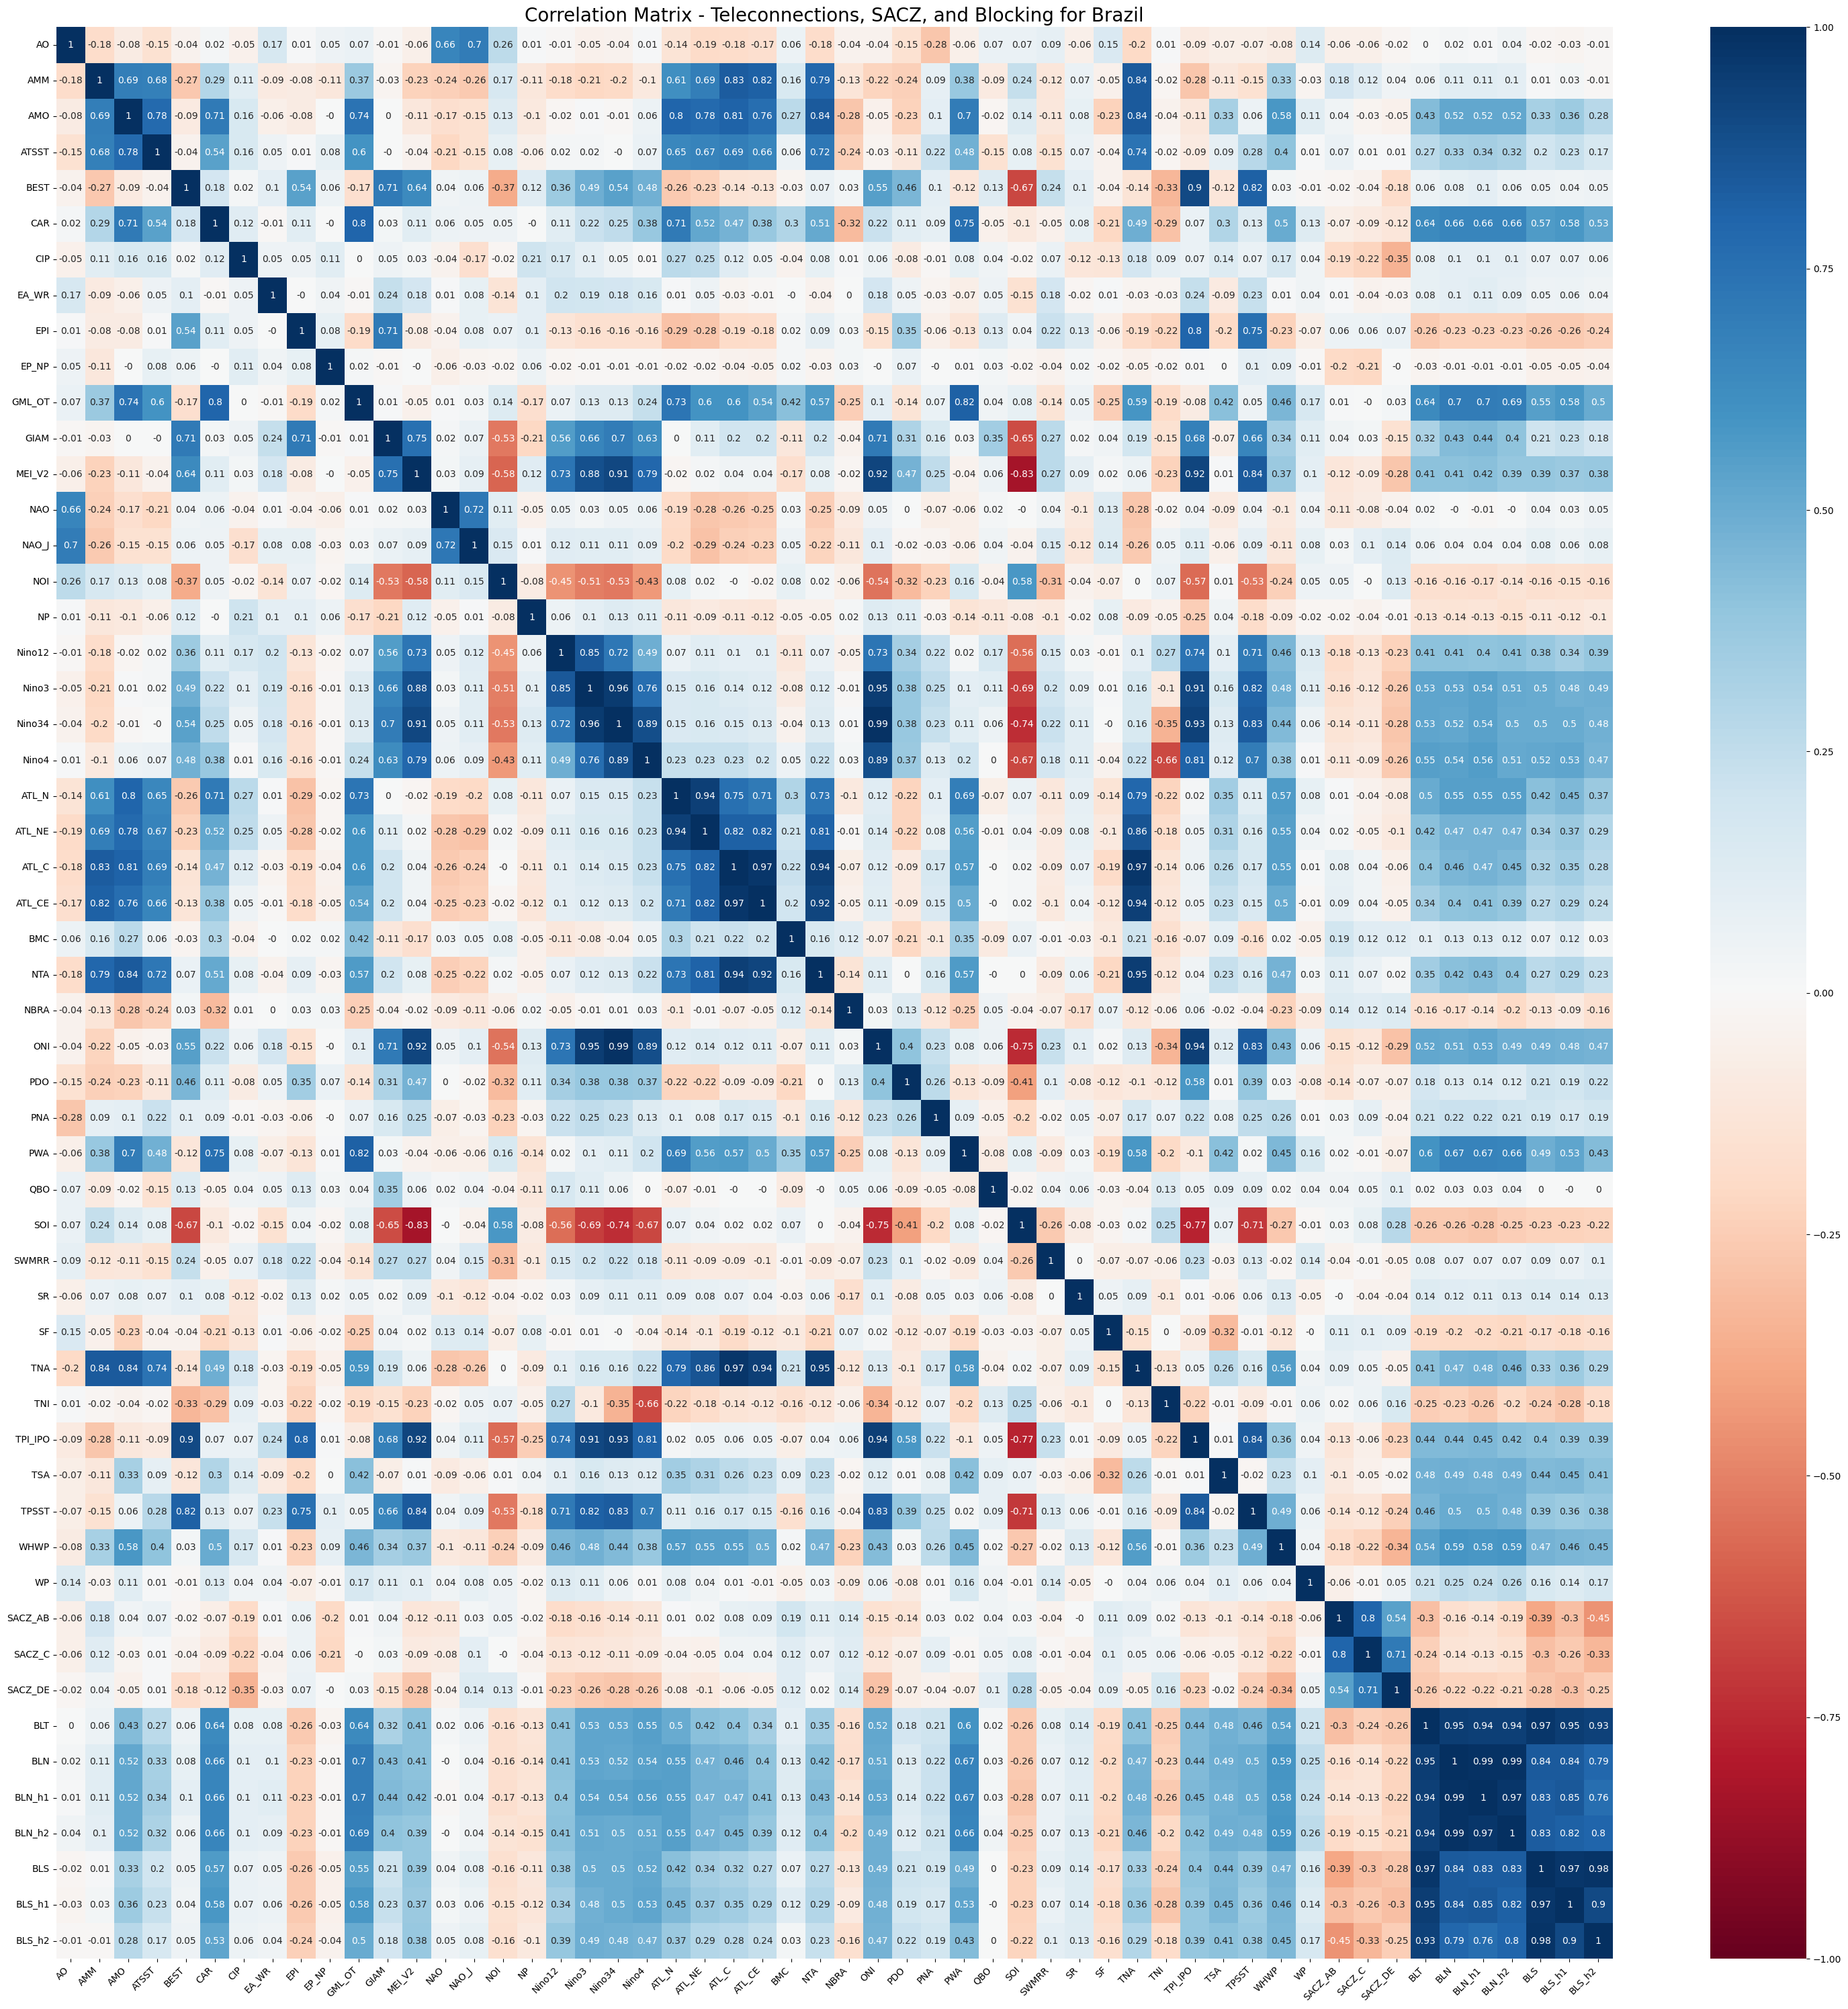

In [ ]:
# Plotando a matriz de correlação

fig1 = correlation_matrix(df_scaled, analise)
fig1.show()

# Caminho para salvar as figuras
save_path = '/content/drive/My Drive/CNPQ_MUD_CLIMA/Artigo_Atmosphere/figuras/'

# Certificar-se de que a pasta existe
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Salvando a figura
fig1.savefig(os.path.join(save_path, f"correlation_matrix_{analise}.png"), dpi=300)

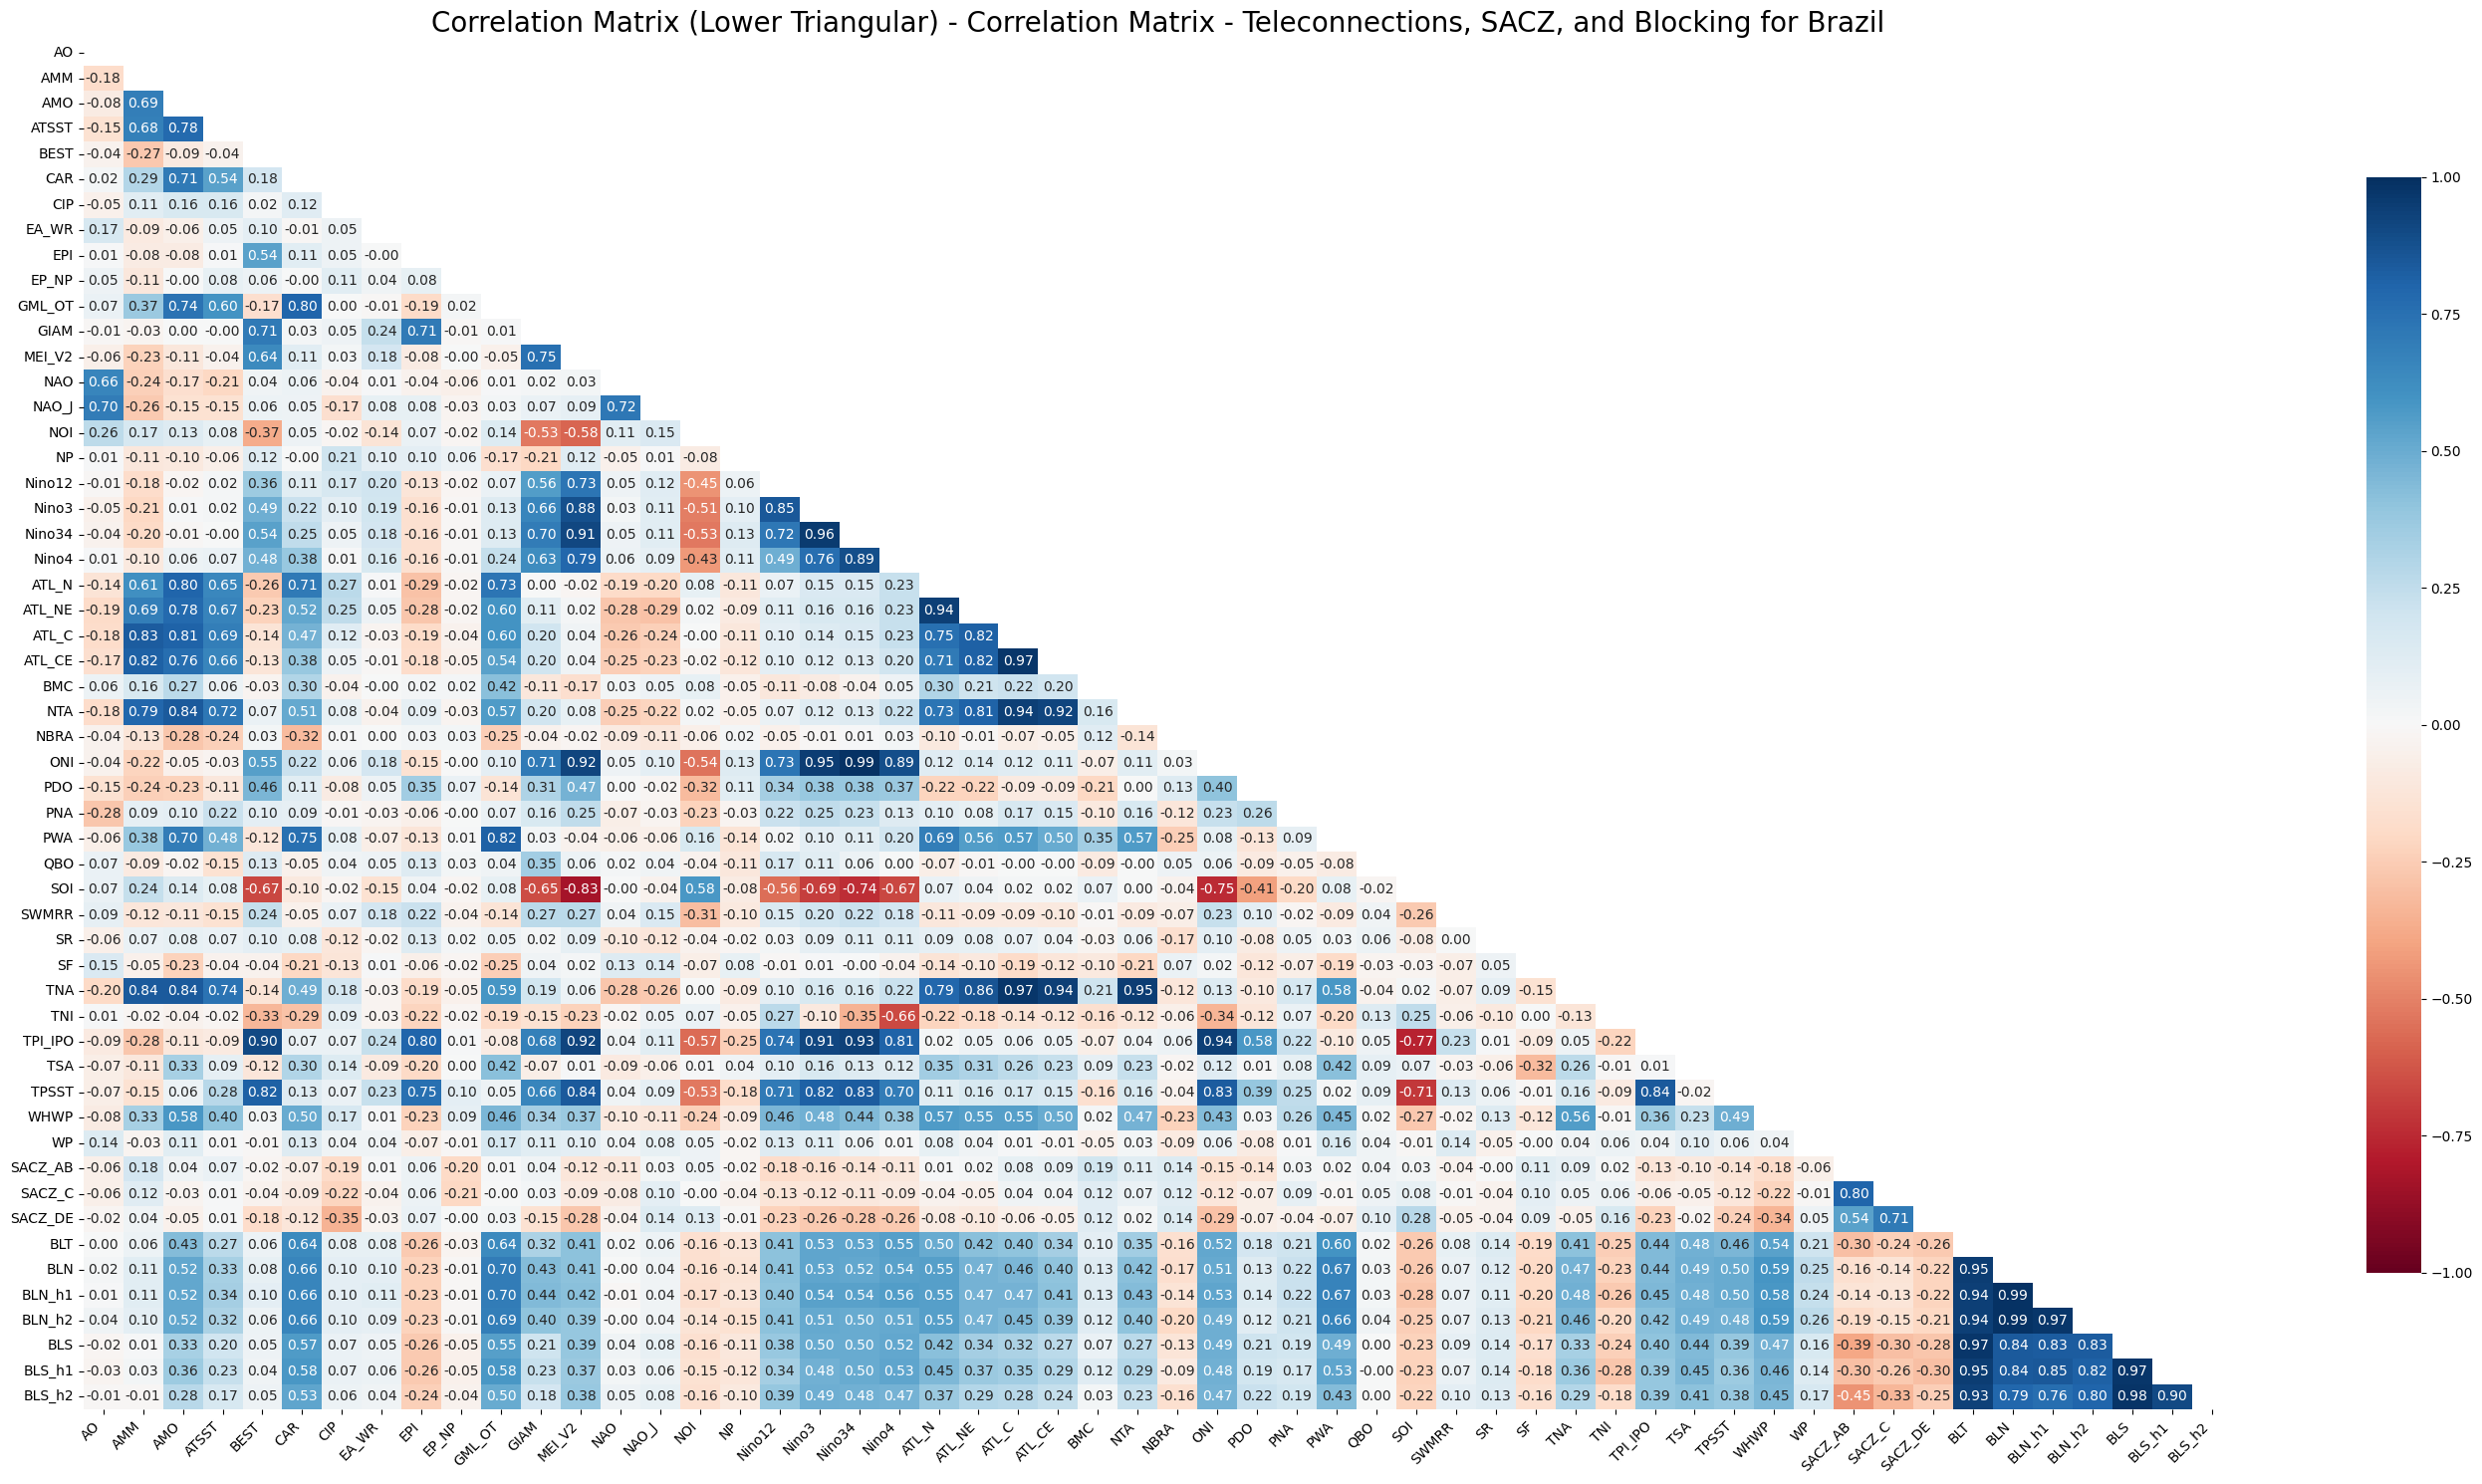

In [ ]:
fig2 = correlation_matrix_half(df_scaled, analise)
fig2.show()

# Salvando a figura
fig2.savefig(os.path.join(save_path, f"correlation_matrix_half_{analise}.png"), dpi=300)


#### Teste de Man Kendall

In [ ]:
# Criar um DataFrame para armazenar os resultados
results = []

# Executando o teste de Mann-Kendall para cada coluna de interesse
for column in df_scaled.columns:
    if column != 'time':  # Excluir a coluna de tempo
        # Aplicando o teste de Mann-Kendall
        result = mk.original_test(df_scaled[column])

        # Adicionando os resultados ao DataFrame
        results.append({
            "Variable": column,
            "Trend": result.trend,
            "P-value": result.p,
            "Tau": result.Tau,
            "h": result.h  # Substituí S por h
        })

        # Exibindo os resultados
        print(f"Mann-Kendall Test for {column}:")
        print(f"Trend: {result.trend}, p-value: {result.p}")
        print(f"Tau: {result.Tau}, h: {result.h}")
        print("-" * 50)

# Criando o DataFrame com os resultados
df_trends = pd.DataFrame(results)

# Definir o nome do arquivo CSV com base na análise
csv_filename = f"/home/louise/Documentos/projeto_cnpq/artigo_atmosphere/mannkendall_{analise}.csv"

# Salvando o DataFrame como CSV
df_trends.to_csv(csv_filename, index=False, encoding="utf-8")

print(f"Results saved to: {csv_filename}")


Mann-Kendall Test for SACZ_AB:
Trend: no trend, p-value: 0.5439387441362549
Tau: 0.023477297895902548, h: False
--------------------------------------------------
Mann-Kendall Test for SACZ_C:
Trend: no trend, p-value: 0.9611505112473873
Tau: -0.0019047619047619048, h: False
--------------------------------------------------
Mann-Kendall Test for SACZ_DE:
Trend: no trend, p-value: 0.6744482089302604
Tau: 0.016256921373200443, h: False
--------------------------------------------------
Mann-Kendall Test for BLT:
Trend: increasing, p-value: 0.0
Tau: 0.3326688815060908, h: True
--------------------------------------------------
Mann-Kendall Test for BLN:
Trend: increasing, p-value: 0.0
Tau: 0.37869324473975635, h: True
--------------------------------------------------
Mann-Kendall Test for BLN_h1:
Trend: increasing, p-value: 0.0
Tau: 0.37196013289036545, h: True
--------------------------------------------------
Mann-Kendall Test for BLN_h2:
Trend: increasing, p-value: 0.0
Tau: 0.3760797

Figure saved to: /home/louise/Documentos/projeto_cnpq/artigo_atmosphere/mannk_sacz_blocking_spi.png


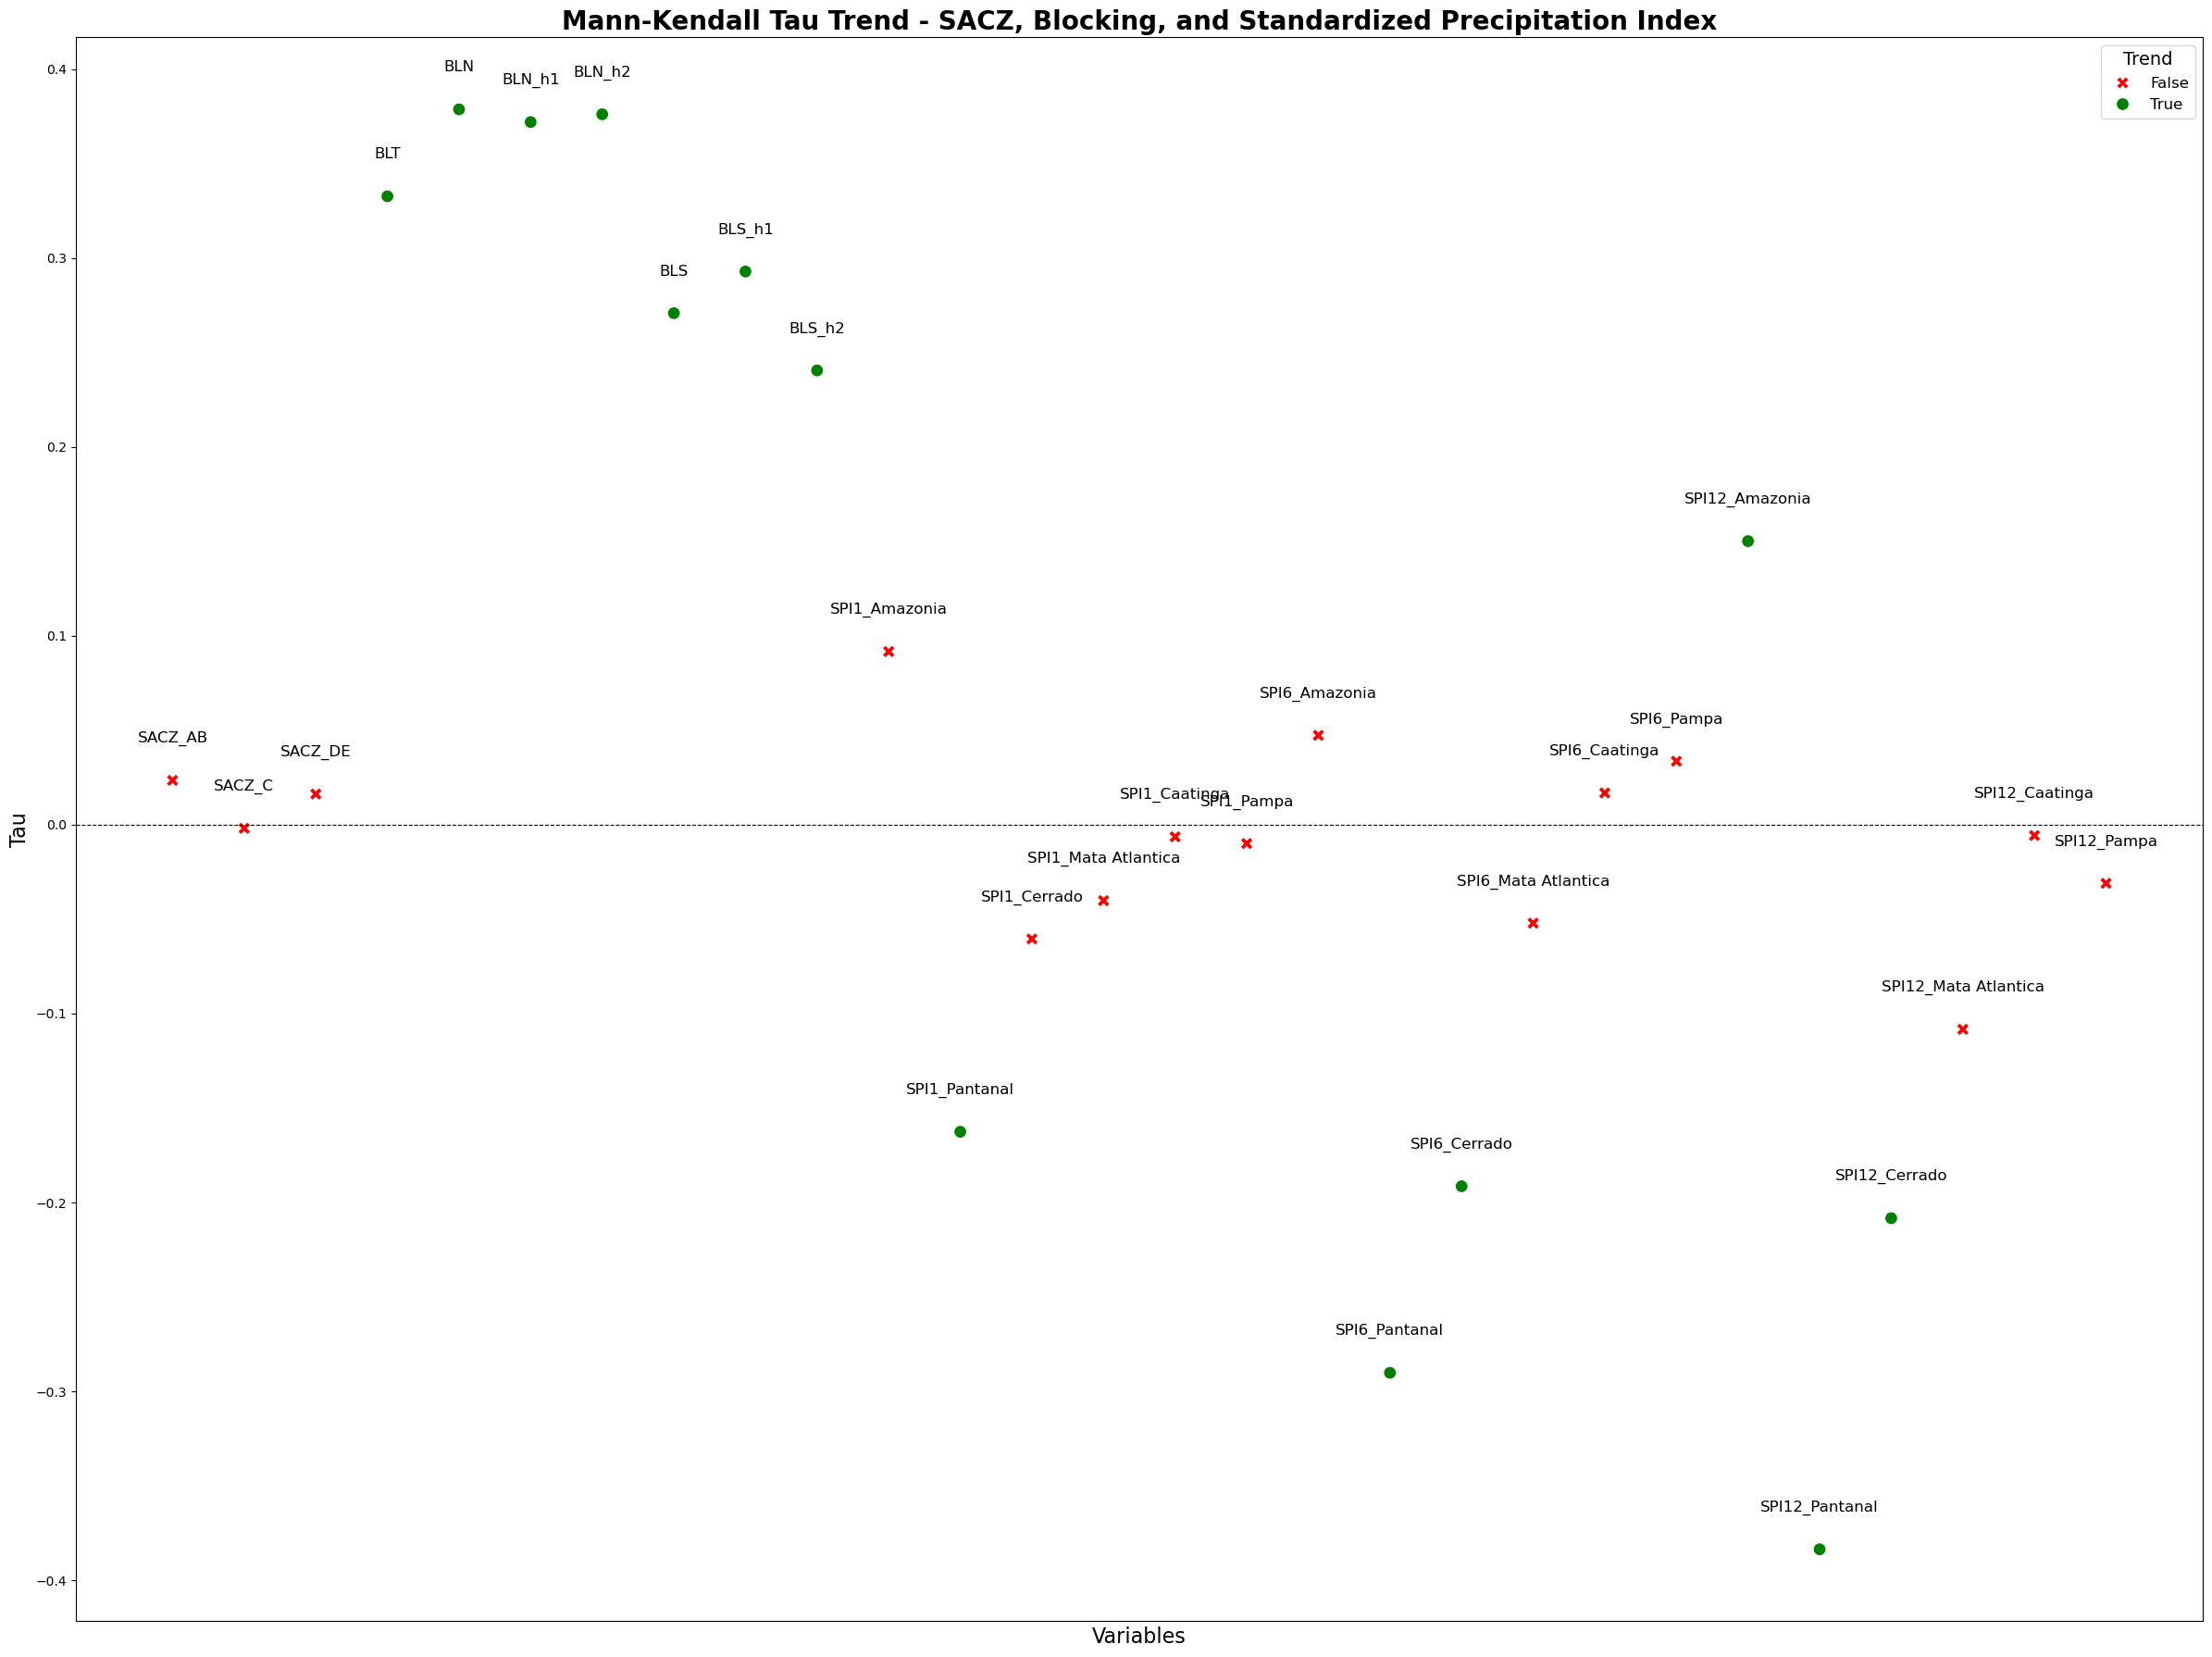

In [ ]:
# Define dynamic titles based on analysis type
titles_trends = {
    "sacz_blocking_hw": "Mann-Kendall Tau Trend - SACZ, Blocking, and Extreme Heatwave Index",
    "tele_sacz_blocking": "Mann-Kendall Tau Trend - Teleconnections, SACZ, and Blocking",
    "sacz_blocking_vazao": "Mann-Kendall Tau Trend - SACZ, Blocking, and River Flow",
    "sacz_blocking_spi": "Mann-Kendall Tau Trend - SACZ, Blocking, and Standardized Precipitation Index"
}

# Get the appropriate title based on analysis type
title_trend = titles_trends.get(analise, "Mann-Kendall Tau Trend")

# Define significance colors and markers
palette = {True: "green", False: "red"}
markers = {True: "o", False: "X"}

# Define significance based on p-value threshold
df_trends["Tendencia"] = df_trends["P-value"] < 0.001

# Scatterplot
plt.figure(figsize=(24, 18))
sns.scatterplot(data=df_trends, x="Variable", y="Tau", hue="Tendencia", style="Tendencia",
                palette=palette, markers=markers, s=100)

# Add labels for each variable (adjust position)
for i, var in enumerate(df_trends["Variable"]):
    plt.text(i, df_trends["Tau"].iloc[i] + 0.02, var, ha='center', fontsize=12, color='black')

# Add a horizontal line at 0 to distinguish positive and negative trends
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Title and axis labels
plt.title(title_trend, fontsize=20, weight='bold')
plt.ylabel("Tau", fontsize=16)
plt.xlabel("Variables", fontsize=16)

# Adjust x-axis: remove labels but keep spacing
plt.xticks([])

# Add legend for trends
plt.legend(title="Trend", title_fontsize=14, fontsize=12)

# Final layout adjustments
plt.tight_layout()

# Define dynamic filename and save the figure
fig_filename = f"/home/louise/Documentos/projeto_cnpq/artigo_atmosphere/mannk_{analise}.png"
plt.savefig(fig_filename, dpi=300)  # Save with high resolution

print(f"Figure saved to: {fig_filename}")

# Optional: Display the plot
# plt.show()
